# Qibolab v0.1.6 2Q emulator: Rabi

In [1]:
import pathlib, os, sys
emulator_folder = pathlib.Path(os.path.abspath('')).parent.parent/'emulator_platforms/' # path to parent diectory of emulator platform folder
sys.path.append(emulator_folder.as_posix())

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from qibolab.pulses import Pulse, ReadoutPulse, PulseSequence, Drag, Rectangular
from qibolab.execution_parameters import ExecutionParameters

from qutip import tensor, sigmaz
def expectation_value(state_list, operator = tensor(sigmaz(),sigmaz())):
        return [(state * operator).tr() for state in state_list] 

from nqch_rd_sq_a11 import create

emulator_platform = create()
pulse_simulator = emulator_platform.instruments['pulse_simulator']
simulation_backend = pulse_simulator.simulation_backend

INFO:root:nqch_rd_sq_a11 emulator running general no coupler CR drive model on Qutip backend
INFO:root:emulator qubits: ['0', '1']
INFO:root:emulator couplers: []
INFO:root:runcard qubits: [0, 1]
INFO:root:sampling rate: 5.89824GHz
INFO:root:simulation sampling boost: 10
[Qibo 0.2.7|INFO|2024-05-27 11:48:44]: Loading platform nqch_rd_sq_a11 emulator running general no coupler CR drive model on Qutip backend
INFO:qibo.config:Loading platform nqch_rd_sq_a11 emulator running general no coupler CR drive model on Qutip backend


Hilbert space structure:  ['1', '0']
Hilbert space dimensions:  [2, 2]


[Qibo 0.2.7|INFO|2024-05-27 11:48:44]: Connecting to instrument <qibolab.instruments.emulator.pulse_simulator.PulseSimulator object at 0x0000016F99EA9250>.
INFO:qibo.config:Connecting to instrument <qibolab.instruments.emulator.pulse_simulator.PulseSimulator object at 0x0000016F99EA9250>.
[Qibo 0.2.7|INFO|2024-05-27 11:48:44]: Connecting to nqch_rd_sq_a11 emulator running general no coupler CR drive model on Qutip backend.
INFO:qibo.config:Connecting to nqch_rd_sq_a11 emulator running general no coupler CR drive model on Qutip backend.


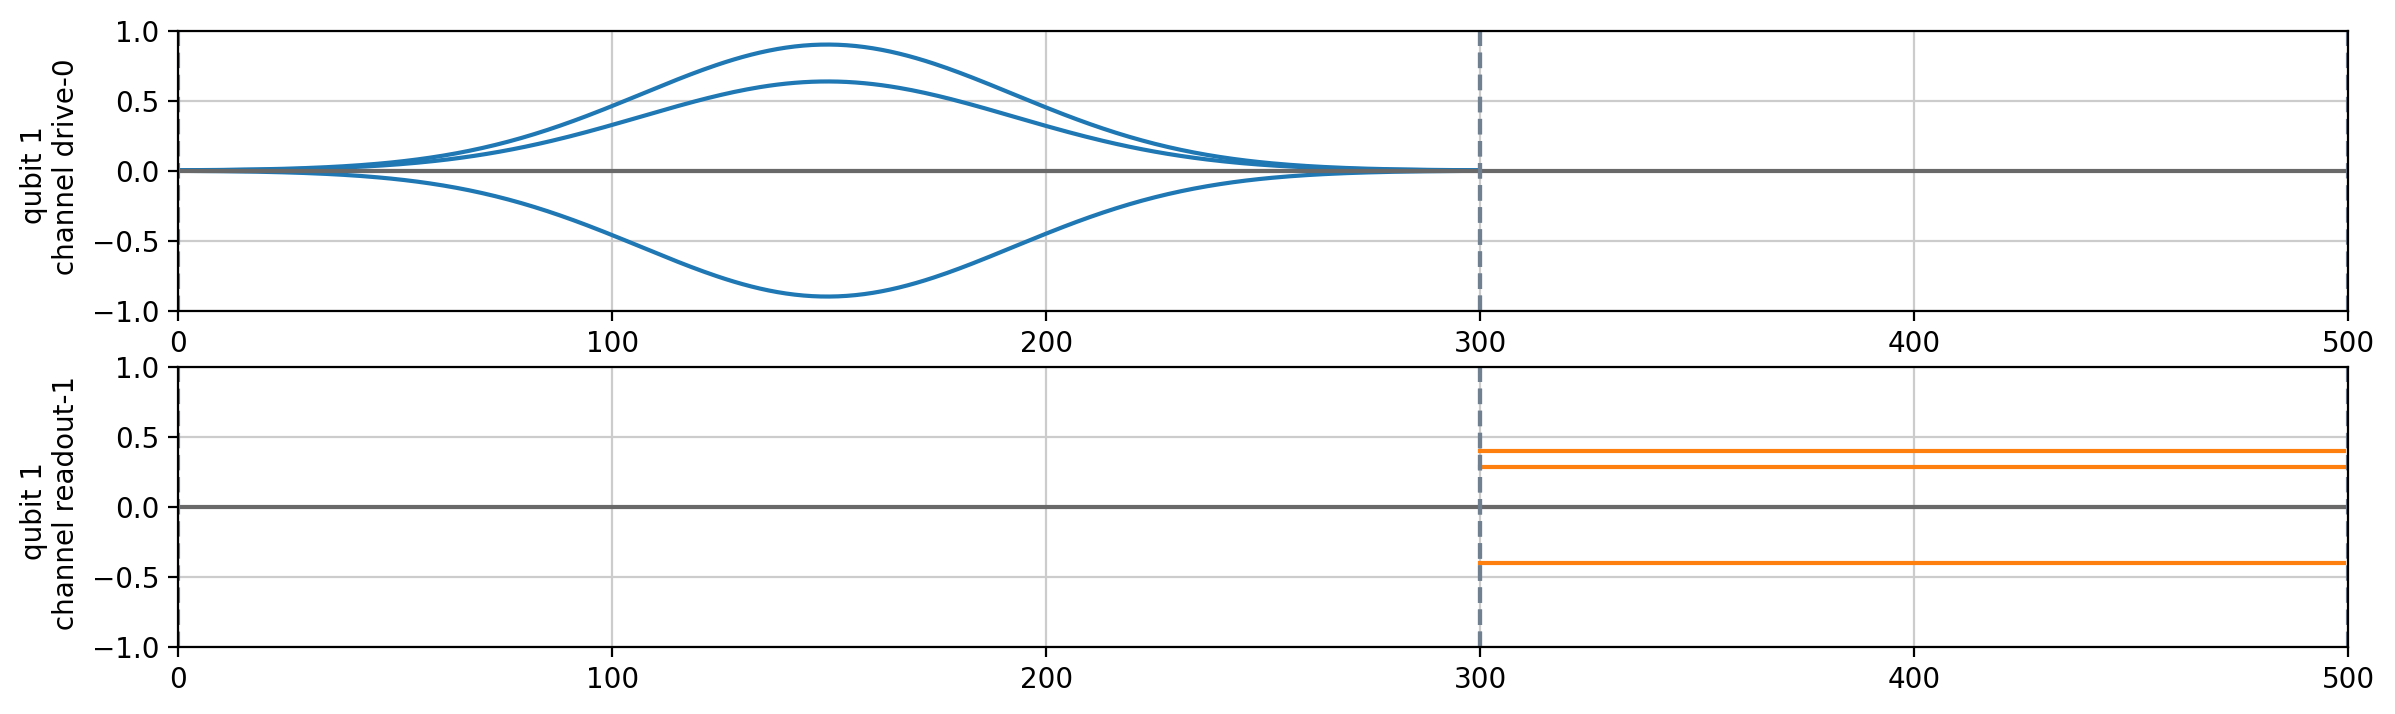

[Qibo 0.2.7|INFO|2024-05-27 11:48:45]: Minimal execution time (sequence): 0.0020050000000000003
INFO:qibo.config:Minimal execution time (sequence): 0.0020050000000000003


 Total run time:  49.44s*] Elapsed 49.43s / Remaining 00:00:00:00***      13%           ] Elapsed 6.14s / Remaining 00:00:00:41[***      15%           ] Elapsed 7.90s / Remaining 00:00:00:44[***      15%           ] Elapsed 8.00s / Remaining 00:00:00:45[*****    20%           ] Elapsed 10.58s / Remaining 00:00:00:42[*****    23%           ] Elapsed 12.17s / Remaining 00:00:00:40[*******  29%           ] Elapsed 15.13s / Remaining 00:00:00:37[******** 35%           ] Elapsed 19.12s / Remaining 00:00:00:35[*********40%           ] Elapsed 21.73s / Remaining 00:00:00:32[*********46%           ] Elapsed 25.18s / Remaining 00:00:00:29[*********47%           ] Elapsed 25.71s / Remaining 00:00:00:28[*********50%           ] Elapsed 27.28s / Remaining 00:00:00:27[*********53%           ] Elapsed 28.49s / Remaining 00:00:00:25[*********57%*          ] Elapsed 30.61s / Remaining 00:00:00:23[*********60%**         ] Elapsed 32.01s / Remaining 00:00:00:21[*********62%**         ] Elapsed 32.63s / 

In [2]:
# Creating platform and connecting
platform = emulator_platform
platform.connect()

# Creating readout pulses for qubits 6 and 7
q0_ro = platform.create_qubit_readout_pulse(0, 0)
q1_ro = platform.create_qubit_readout_pulse(1, 0)
q0_ro.duration = 200
q1_ro.duration = 200

# Creating pi pulses for qubits 6 and 7
q0_pi_pulse = platform.create_RX_pulse(qubit=0, start=0)
q1_pi_pulse = platform.create_RX_pulse(qubit=1, start=0)

CR_pulse = q1_pi_pulse.copy()
CR_pulse.channel = q0_pi_pulse.channel
#q0_pi_pulse.amplitude = 1
#q1_pi_pulse.amplitude = 1
flipping_X = q0_pi_pulse.copy()

# Uncomment for single X
gnd_ps = PulseSequence(*[CR_pulse, q1_ro])
#gnd_ps = PulseSequence(*[CR_pulse, flipping_X, q1_ro])
CR_pulse.start = 0
CR_pulse.duration = 300
#flipping_X.start = 45
q1_ro.start = CR_pulse.finish
gnd_ps.plot()

gnd_results = platform.execute_pulse_sequence(gnd_ps, options = ExecutionParameters(nshots=10))
channel_waveforms = pulse_simulator.channel_waveforms_history[-1]
gnd_full_time_list = channel_waveforms['time']
gnd_psi_t_list = simulation_backend.pulse_sim_history[-1]
gnd_expectation = expectation_value(gnd_psi_t_list)

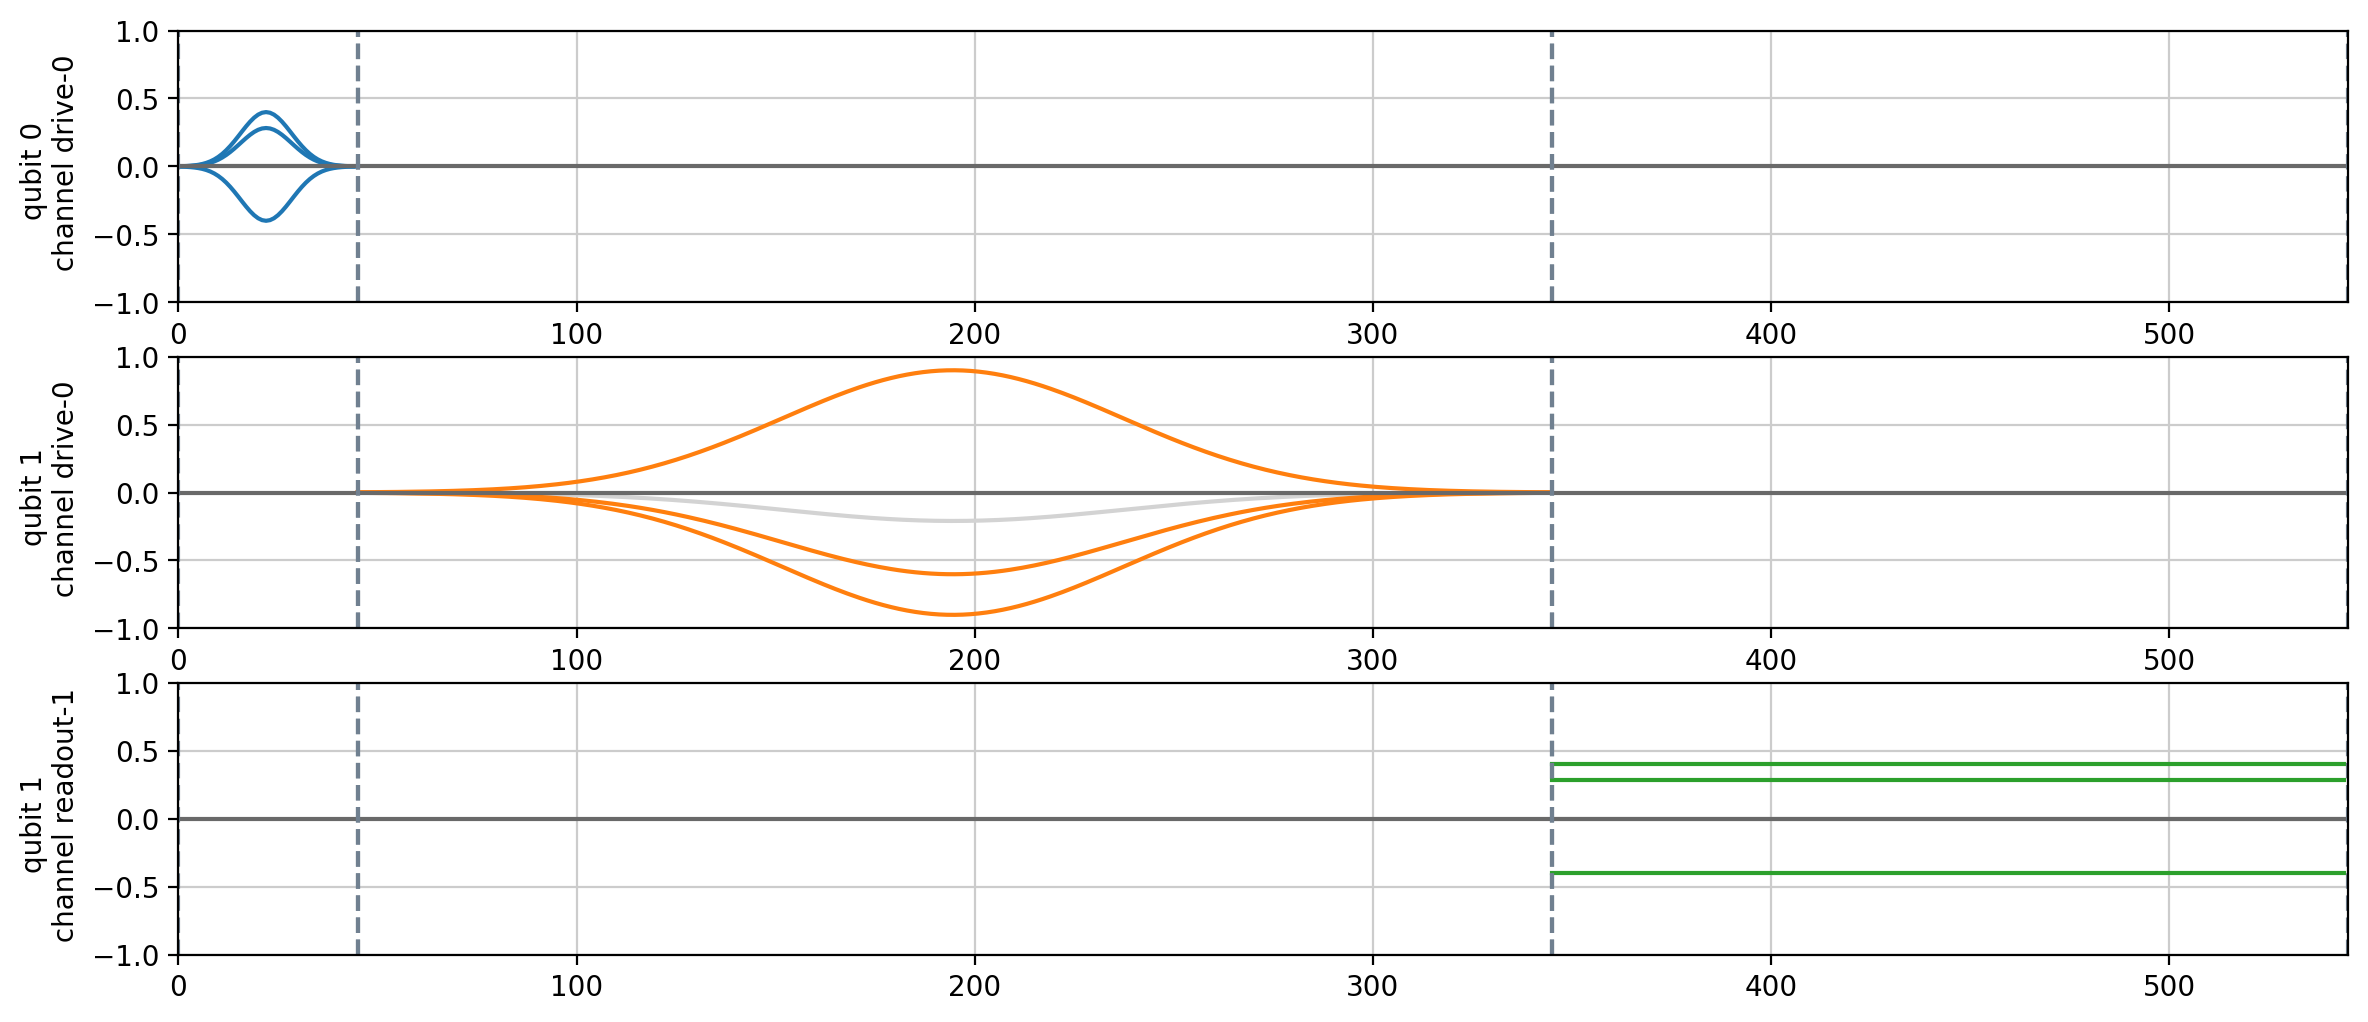

[Qibo 0.2.7|INFO|2024-05-27 11:49:38]: Minimal execution time (sequence): 0.00200545
INFO:qibo.config:Minimal execution time (sequence): 0.00200545


 Total run time:  61.82s*] Elapsed 61.82s / Remaining 00:00:00:00          2%           ] Elapsed 1.04s / Remaining 00:00:00:51[*         6%           ] Elapsed 3.53s / Remaining 00:00:00:55[**       10%           ] Elapsed 5.52s / Remaining 00:00:00:49[***      15%           ] Elapsed 8.07s / Remaining 00:00:00:45[****     16%           ] Elapsed 8.55s / Remaining 00:00:00:44[****     17%           ] Elapsed 9.33s / Remaining 00:00:00:45[*****    21%           ] Elapsed 11.37s / Remaining 00:00:00:42[******   24%           ] Elapsed 13.30s / Remaining 00:00:00:42[******** 36%           ] Elapsed 21.64s / Remaining 00:00:00:38[*********37%           ] Elapsed 22.69s / Remaining 00:00:00:38[*********40%           ] Elapsed 24.08s / Remaining 00:00:00:36[*********40%           ] Elapsed 24.36s / Remaining 00:00:00:36[*********46%           ] Elapsed 28.30s / Remaining 00:00:00:33[*********47%           ] Elapsed 28.73s / Remaining 00:00:00:32[*********50%           ] Elapsed 31.75s / Rem

In [3]:
# Creating platform and connecting
platform = emulator_platform
platform.connect()

# Creating readout pulses for qubits 6 and 7
q0_ro = platform.create_qubit_readout_pulse(0, 0)
q1_ro = platform.create_qubit_readout_pulse(1, 0)
q0_ro.duration = 200
q1_ro.duration = 200

# Creating pi pulses for qubits 6 and 7
q0_pi_pulse = platform.create_RX_pulse(qubit=0, start=0)
q1_pi_pulse = platform.create_RX_pulse(qubit=1, start=0)

CR_pulse = q1_pi_pulse.copy()
CR_pulse.channel = q0_pi_pulse.channel
#q0_pi_pulse.amplitude = 1
#q1_pi_pulse.amplitude = 1
flipping_X = q0_pi_pulse.copy()

# Uncomment for single X
exc_ps = PulseSequence(*[q0_pi_pulse, CR_pulse, q1_ro])
#exc_ps = PulseSequence(*[q0_pi_pulse, CR_pulse, flipping_X, q1_ro])
q0_pi_pulse.start = 0
CR_pulse.start = q0_pi_pulse.finish
CR_pulse.duration = 300
#flipping_X.start = 90
q1_ro.start = CR_pulse.finish
exc_ps.plot()

exc_results = platform.execute_pulse_sequence(exc_ps, options = ExecutionParameters(nshots=10))
channel_waveforms = pulse_simulator.channel_waveforms_history[-1]
exc_full_time_list = channel_waveforms['time']
exc_psi_t_list = simulation_backend.pulse_sim_history[-1]
exc_expectation = expectation_value(exc_psi_t_list)

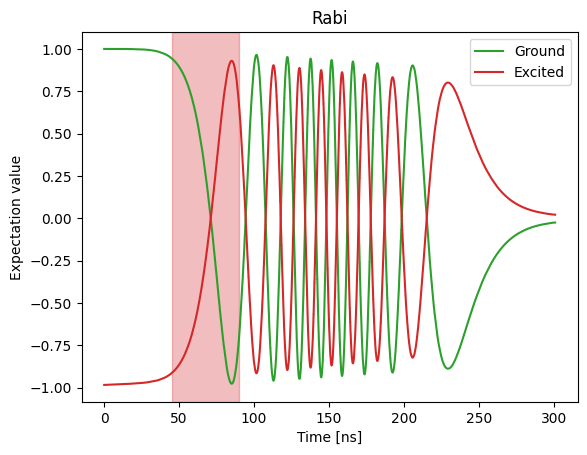

In [4]:
exc_expectation = np.asarray(exc_expectation)

plt.plot(gnd_full_time_list,gnd_expectation,label = 'Ground', color = 'C2')
plt.plot(exc_full_time_list[exc_full_time_list>45]-45,exc_expectation[exc_full_time_list>45],label='Excited', color = 'C3')
#plt.plot(exc_full_time_list,exc_expectation,label='Excited')
plt.axvspan(45,90,alpha = 0.3, color = 'C3')

plt.title('Rabi')
plt.xlabel('Time [ns]')
plt.ylabel('Expectation value')
plt.legend()

np.save('single_x_gnd.npy',gnd_expectation)
np.save('single_x_exc.npy',exc_expectation[exc_full_time_list>45])
np.save('single_x_gnd_times.npy',gnd_full_time_list)
np.save('single_x_exc_times.npy',exc_full_time_list[exc_full_time_list>=45]-45)

exc_expectation = np.asarray(exc_expectation)

plt.plot(gnd_full_time_list,gnd_expectation,label = 'Ground', color = 'C2')
plt.plot(exc_full_time_list[exc_full_time_list>=45]-45,exc_expectation[exc_full_time_list>=45],label='Excited', color = 'C3')
#plt.plot(exc_full_time_list,exc_expectation,label='Excited')
plt.axvspan(45,90,alpha = 0.3, color = 'C3')

plt.title('Rabi')
plt.xlabel('Time [ns]')
plt.ylabel('Expectation value')
plt.legend()

np.save('rabi_gnd.npy',gnd_expectation)
np.save('rabi_exc.npy',exc_expectation[exc_full_time_list>=45])
np.save('rabi_gnd_times.npy',gnd_full_time_list)
np.save('rabi_exc_times.npy',exc_full_time_list[exc_full_time_list>=45]-45)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
rabi_gnd = np.load('rabi_gnd.npy')
rabi_exc = np.load('rabi_exc.npy')
rabi_gnd_times = np.load('rabi_gnd_times.npy')
rabi_exc_times = np.load('rabi_exc_times.npy')

In [6]:
single_x_gnd = np.load('single_x_gnd.npy')
single_x_exc = np.load('single_x_exc.npy')
single_x_gnd_times = np.load('single_x_gnd_times.npy')
single_x_exc_times = np.load('single_x_exc_times.npy')

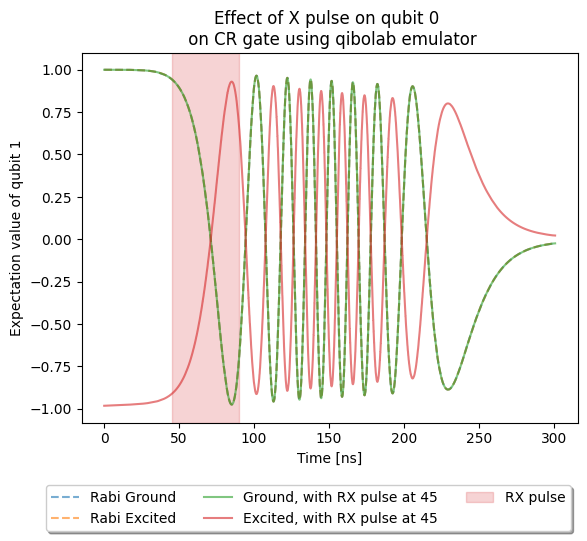

In [7]:
plt.plot(rabi_gnd_times,rabi_gnd,label = 'Rabi Ground', color = 'C0',linestyle = '--',alpha = 0.6)
plt.plot(rabi_exc_times,rabi_exc,label='Rabi Excited', color = 'C1',linestyle = '--',alpha = 0.6)
plt.plot(single_x_gnd_times,single_x_gnd,label = 'Ground, with RX pulse at 45', color = 'C2',alpha = 0.6)
plt.plot(single_x_exc_times,single_x_exc,label='Excited, with RX pulse at 45', color = 'C3',alpha = 0.6)

#plt.plot(exc_full_time_list,exc_expectation,label='Excited')
plt.axvspan(45,90,alpha = 0.2, color = 'C3', label = 'RX pulse')

plt.title('Effect of X pulse on qubit 0 \n on CR gate using qibolab emulator')
plt.xlabel('Time [ns]')
plt.ylabel('Expectation value of qubit 1')
plt.legend(bbox_to_anchor=(1, -0.15),shadow=True, ncol=3)